In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Specify the file path to your CSV file
file_path='C:/Users/Fatima Hassan/Downloads/amazon_prime_titles.csv'

In [3]:
yt_data = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
yt_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [4]:
yt_data.describe()

#this able will only show values for numeric data

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [5]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [6]:
unique_values = yt_data.nunique() # unique values = rows,
unique_values

show_id         9668
type               2
title           9668
director        5773
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

In [7]:
#this code will show me all the columns names
cols = yt_data.columns
cols

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
yt_data.isna().sum() # unique identifier//primary it shouldnt be > 0

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
# Calculate the percentage of missing values for each variable
missing_data_percentage = (yt_data.isnull().sum() / len(yt_data)) * 100


# Create a DataFrame to display the results

missing_data = pd.DataFrame({'Variable': yt_data.columns, 'Missing Percentage': missing_data_percentage})
missing_data = missing_data[missing_data['Missing Percentage'] > 0]  
print(missing_data)

              Variable  Missing Percentage
director      director           21.545304
cast              cast           12.753413
country        country           93.049235
date_added  date_added           98.396773
rating          rating            3.485726


In [10]:
# Finding duplicate rows
duplicate_rows = yt_data[yt_data.duplicated(keep='first')]

# Number of duplicate rows, UNIQUE identifiers
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


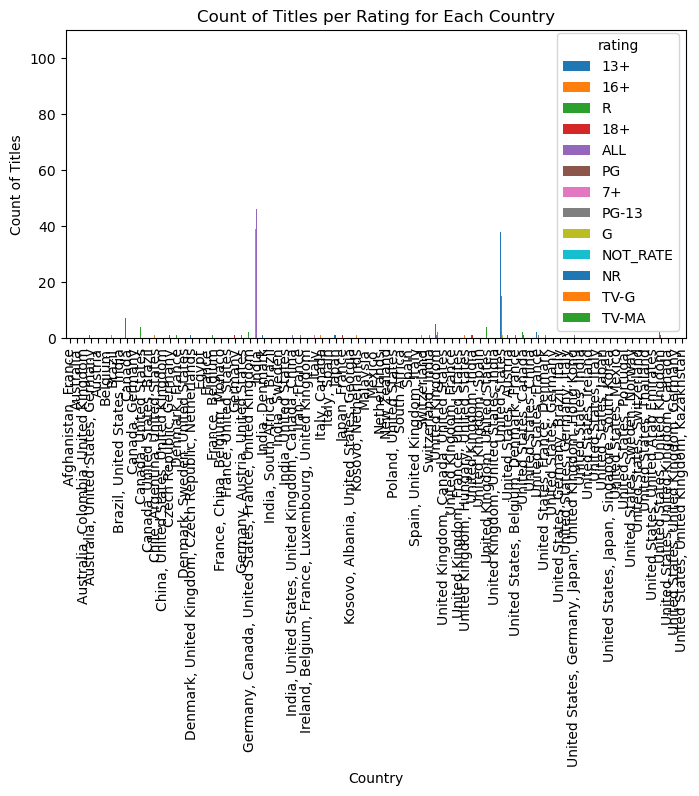

In [14]:
country_rating_count = yt_data.groupby(['country', 'rating']).size().unstack(fill_value=0)

# Plotting
country_rating_count.plot(kind='bar', figsize=(8, 4))
plt.xlabel('Country')
plt.ylabel('Count of Titles')
plt.title('Count of Titles per Rating for Each Country')
plt.show()

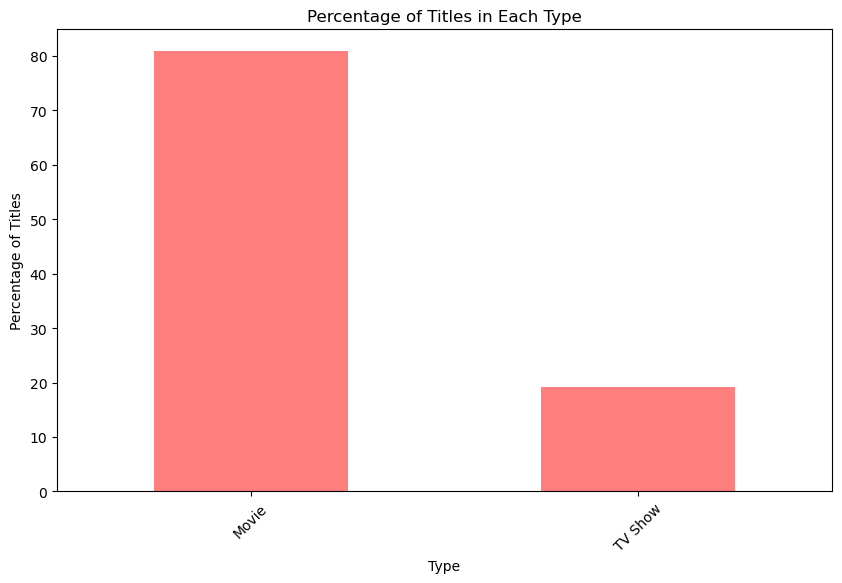

In [16]:
# Group the data by 'type' and calculate the percentage of each type
type_percentage = (yt_data['type'].value_counts() / yt_data['type'].count()) * 100

# Sort the values in descending order
type_percentage_sorted = type_percentage.sort_values(ascending=False)

# Create a bar chart to visualize the sorted percentage distribution
plt.figure(figsize=(10, 6))
type_percentage_sorted.plot(kind='bar', color='red', alpha=0.5)
plt.xlabel('Type')
plt.ylabel('Percentage of Titles')
plt.title('Percentage of Titles in Each Type')
plt.xticks(rotation=45)
plt.show()

In [17]:
# 5 number summary descriptive analysis
yt_data.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


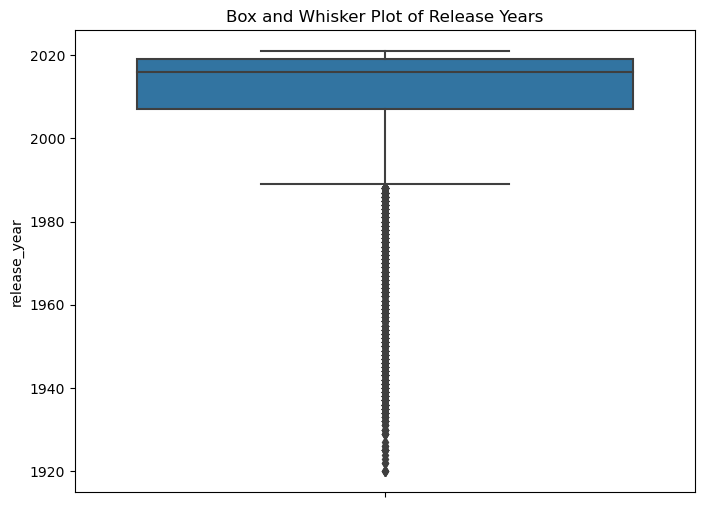

In [19]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(y=yt_data['release_year'])
plt.title('Box and Whisker Plot of Release Years')
plt.show()
#Conversely, if the median line was closer to the top of the box,
#and the lower whisker was significantly longer than the upper whisker, 
#this would suggest a negative skew.
#This would mean that more titles were released in earlier years.

# The Box:

Imagine the box as the "middle" part of all the years when the titles were released.
The line in the middle of the box is the "median" – it's like an average, showing the middle year in all the data.
The top and bottom edges of the box are the "quartiles". The top edge shows where the higher 25% of the years start, and the bottom edge shows where the lower 25% end.
The Whiskers:

These are the lines that stick out from the top and bottom of the box.
They reach out to the oldest and the newest years in the data, but not including very unusual or rare years (those are the outliers).
Dots or Outliers:

Sometimes, there are dots or small circles outside the whiskers. These represent years that are not typical – they're either much older or much newer than most of the other years.
In summary, this box plot is a quick way to see when most of the titles on Amazon Prime were released. The box shows the most common years, and the whiskers extend to include almost all the rest. The dots tell you about the very unusual years.

In [20]:
# Calculate the range using np.ptp
year_range = np.ptp(yt_data['release_year'])

print("Range of Release Year:", year_range)

Range of Release Year: 101


In [21]:
# IQR = Q3 - Q1
from scipy.stats import iqr
iqr(yt_data["release_year"])

#The Interquartile Range (IQR) for the 'release_year'
#column in the Amazon Prime dataset is 12.0 years.
#This value represents the range between the 25th percentile (Q1)
#and the 75th percentile (Q3) of the release years. In other words, 
#the middle 50% of the titles in the dataset were released within a 12-year period. 
#This measure gives an idea of the spread or dispersion of the release years,
#focusing on the central portion of the dataset

12.0

In [22]:
from scipy.stats import skew
skew(yt_data['release_year'])

-2.3453128463517476

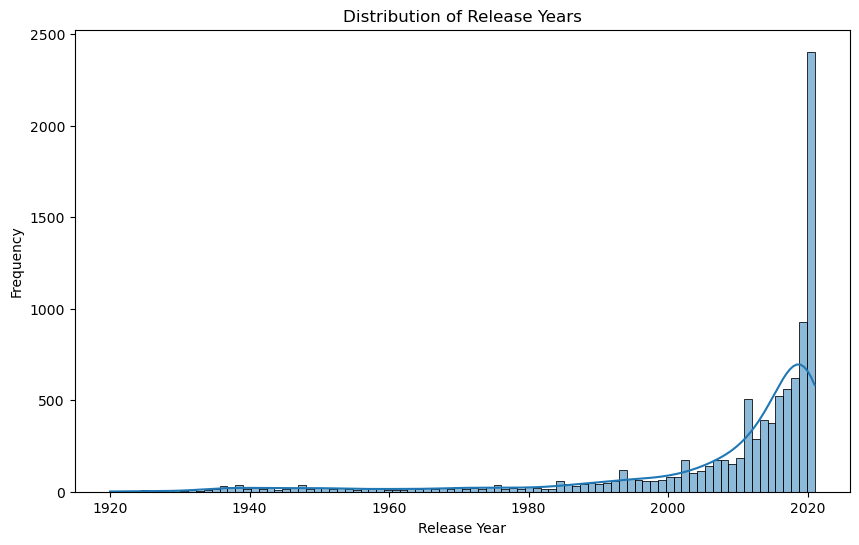

In [26]:
# Plotting a histogram with a KDE overlay for the release year
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(yt_data['release_year'], kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

In [27]:
release_year_75_percentile = np.percentile(yt_data['release_year'], 75)

print("75th Percentile of Release Year:", release_year_75_percentile)


#The code calculates the 75th percentile of the
#'release_year' column in the Amazon Prime dataset. 
#The result, 2019.0, means that 75% of the titles in the 
#dataset were released in the year 2019 or earlier.
#This percentile provides a way to understand up to what year the majority (75%) of
#the content was released. ​​







75th Percentile of Release Year: 2019.0


In [28]:
#zscores
## z = x - mean / sd

from scipy.stats import zscore
zscore(yt_data['release_year'])

#A z-score close to 0 means the release year is close to the average release year of all titles.
#A positive z-score means the title was released after the average year.
#A negative z-score means the title was released before the average year.
#The bigger the z-score (positive or negative), the further away the release year is from the average year.

0       0.299033
1       0.510433
2       0.457583
3       0.299033
4      -1.022215
          ...   
9663   -3.611861
9664    0.510433
9665   -0.018067
9666    0.668982
9667    0.087633
Name: release_year, Length: 9668, dtype: float64

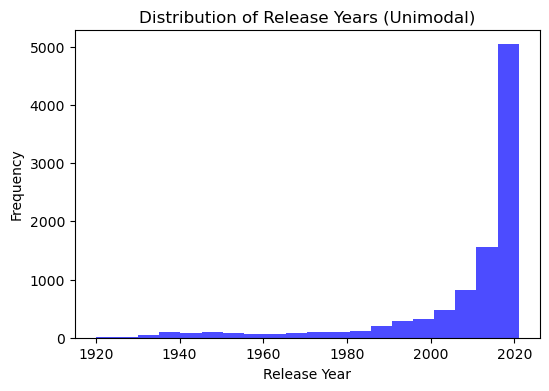

In [29]:
# Plotting histogram for the 'release_year' to show a unimodal distribution
plt.figure(figsize=(6, 4))
plt.hist(yt_data['release_year'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Release Years (Unimodal)')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show() 

In [30]:
# Filter data for United States content
us_data =yt_data [yt_data['country'] == 'United States']

# Extract 'release_year' data for United States content
release_years_us = us_data['release_year']

# Calculate sample mean and standard deviation for United States content
mean_release_years_us = release_years_us.mean()
std_release_years_us = release_years_us.std(ddof=1)  # ddof=1 for sample standard deviation

# Display the results
print(f"Sample Mean for Release Years in United States: {mean_release_years_us}")
print(f"Sample Standard Deviation for Release Years in United States: {std_release_years_us}")



#This code will calculate the average release year and its standard deviation 
#for titles from the United States in the Amazon Prime dataset.
#The ddof=1 parameter ensures that the standard deviation is calculated 
#for a sample, not a population.

Sample Mean for Release Years in United States: 2010.3715415019763
Sample Standard Deviation for Release Years in United States: 14.80978268208326


Null Hypothesis H0:¶
The average number of subscribers for US channels is equal to the overall average.

H0: USsubscribers = Overall subscribers μ US =μ Overall

Alternative Hypothesis H1:
The average number of subscribers for US channels is higher than the overall average.
India >Overall
H1: μ US ​> μ Overall

In [31]:
from scipy.stats import norm
import numpy as np

# Given data for a specific country (United States in this case)
country_specific = 'United States'
country_data = yt_data[yt_data['country'] == country_specific]
mean_release_year_country = country_data['release_year'].mean()
std_release_year_country = country_data['release_year'].std(ddof=1)

# Overall release year data
overall_release_years = yt_data['release_year']

# Set significance level
alpha = 0.05

# Calculate Z-score for one-tailed test (higher)
z_score = (mean_release_year_country - overall_release_years.mean()) / (overall_release_years.std(ddof=1) / np.sqrt(len(overall_release_years)))

# Calculate critical value for a one-tailed test (higher)
critical_value = norm.ppf(1 - alpha)

# Conduct hypothesis test
if z_score > critical_value:
    result_statement = "Reject the null hypothesis"
else:
    result_statement = "Fail to reject the null hypothesis"

# Display results
print(f"Z-score: {z_score}")
print(f"Critical Value: {critical_value}")
print(f"Result: {result_statement}")

Z-score: 10.546791979115893
Critical Value: 1.6448536269514722
Result: Reject the null hypothesis


Z-score: The z-score of about 10.55 tells us that the average release year for titles from the United States is quite a bit later than the average release year for all titles in the dataset.

Critical Value: The critical value is like a benchmark (1.64 in this case). If the z-score is bigger than this number, it means our finding is significant.

Result: Because our z-score (10.55) is much larger than the critical value (1.64), we conclude that the difference in release years is not just by chance. In other words, titles from the United States are, on average, released more recently compared to the overall average of the dataset.

In [32]:
# Final Summary
summary = f"""
Hypothesis Test Summary:
- Tested Feature: Release Year
- Focus Group: Titles from the United States
- Null Hypothesis: The average release year for titles from the United States is the same as the overall average release year.
- Alternative Hypothesis: The average release year for titles from the United States is significantly different (specifically higher) than the overall average release year.

Results:
- Z-Score: {z_score:.2f}
- Critical Value (α = 0.05): {critical_value:.2f}
- Conclusion: {result_statement}

Interpretation:
The average release year for titles from the United States is significantly later than the overall average release year for titles in the dataset. This suggests that the United States titles tend to be more recent.
"""

print(summary)


Hypothesis Test Summary:
- Tested Feature: Release Year
- Focus Group: Titles from the United States
- Null Hypothesis: The average release year for titles from the United States is the same as the overall average release year.
- Alternative Hypothesis: The average release year for titles from the United States is significantly different (specifically higher) than the overall average release year.

Results:
- Z-Score: 10.55
- Critical Value (α = 0.05): 1.64
- Conclusion: Reject the null hypothesis

Interpretation:
The average release year for titles from the United States is significantly later than the overall average release year for titles in the dataset. This suggests that the United States titles tend to be more recent.

